<h3>Load the Data</h3>

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


In [46]:
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv('resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv', \
                   thousands=',')

data.values[0]

array(['2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10',
       '10 TO 12', 44.0, 'Improved', 1979, '61 years 04 months', 232000.0],
      dtype=object)

In [13]:
data['town'].unique().shape[0]
#data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58154 entries, 0 to 58153
Data columns (total 11 columns):
month                  58154 non-null object
town                   58154 non-null object
flat_type              58154 non-null object
block                  58154 non-null object
street_name            58154 non-null object
storey_range           58154 non-null object
floor_area_sqm         58154 non-null float64
flat_model             58154 non-null object
lease_commence_date    58154 non-null int64
remaining_lease        58154 non-null object
resale_price           58154 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 4.9+ MB


In [14]:
month_unix = pd.to_datetime(data['month'], format='%Y-%m').astype(int) / 10**9

town = data['town']
town_one_hot = pd.get_dummies(town,prefix='town')

flat_type = data['flat_type']
flat_type_one_hot = pd.get_dummies(flat_type,prefix='flat_type')


storey_range_one_hot = pd.get_dummies(data['storey_range'],prefix='storey_range')

#floor_area_sqm_one_hot = pd.get_dummies(data['floor_area_sqm'],prefix='floor_area_sqm')

flat_model_one_hot = pd.get_dummies(data['flat_model'], prefix='flat_model')


In [41]:
remaining_lease_yrs =  data.remaining_lease.str.slice(0, 2).astype(int)
print(remaining_lease_yrs)

0        61
1        60
2        62
3        62
4        62
         ..
58149    67
58150    71
58151    71
58152    65
58153    67
Name: remaining_lease, Length: 58154, dtype: int64


In [42]:
oh1 = pd.concat([month_unix,town_one_hot],axis=1,sort=False)
oh2 = pd.concat([oh1,flat_type_one_hot],axis=1,sort=False)
oh3 = pd.concat([oh2,storey_range_one_hot],axis=1,sort=False)
oh4 = pd.concat([oh3,data['floor_area_sqm']],axis=1,sort=False)
oh5 = pd.concat([oh4,flat_model_one_hot],axis=1,sort=False)
oh = pd.concat([oh5, remaining_lease_yrs], axis=1, sort=False)

In [24]:
oh.values[0]
oh.info()
oh['lease_commence_date']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58154 entries, 0 to 58153
Data columns (total 72 columns):
month                                58154 non-null float64
town_ANG MO KIO                      58154 non-null uint8
town_BEDOK                           58154 non-null uint8
town_BISHAN                          58154 non-null uint8
town_BUKIT BATOK                     58154 non-null uint8
town_BUKIT MERAH                     58154 non-null uint8
town_BUKIT PANJANG                   58154 non-null uint8
town_BUKIT TIMAH                     58154 non-null uint8
town_CENTRAL AREA                    58154 non-null uint8
town_CHOA CHU KANG                   58154 non-null uint8
town_CLEMENTI                        58154 non-null uint8
town_GEYLANG                         58154 non-null uint8
town_HOUGANG                         58154 non-null uint8
town_JURONG EAST                     58154 non-null uint8
town_JURONG WEST                     58154 non-null uint8
town_KALLANG/WHAMPO

0        59
1        58
2        60
3        60
4        60
         ..
58149    68
58150    72
58151    72
58152    66
58153    68
Name: lease_commence_date, Length: 58154, dtype: int64

In [58]:
data['town'].unique().size
data['flat_type'].unique().size
data['storey_range'].unique().size
data['flat_model'].unique().size




19

In [53]:
oh.head(1)

,month,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,...,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,remaining_lease
0,1.483229e+09,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,61


In [33]:
oh['floor_area_sqm'][0]

44.0

In [44]:
train_x = oh.values
train_y = data['resale_price'].values
print(train_x)
print(train_y)

[[1.4832288e+09 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 6.1000000e+01]
 [1.4832288e+09 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 6.0000000e+01]
 [1.4832288e+09 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 6.2000000e+01]
 ...
 [1.5672960e+09 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 7.1000000e+01]
 [1.5672960e+09 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 6.5000000e+01]
 [1.5672960e+09 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 6.7000000e+01]]
[232000. 250000. 262000. ... 745000. 605000. 640000.]


In [50]:
train_x, test_x, train_y, test_y = train_test_split(oh.values, data['resale_price'].values, test_size = 0.2, random_state = 0)



In [51]:
print("train_x: ",train_x.shape)
print("test_x: ",test_x.shape)
print("train_y: ",train_y.shape)
print("test_y: ",test_y.shape)

train_x:  (46523, 72)
test_x:  (11631, 72)
train_y:  (46523,)
test_y:  (11631,)


In [65]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(72,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [66]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [67]:
EPOCHS = 10
history = model.fit(train_x, train_y, validation_split=0.2, epochs=EPOCHS, shuffle=True)

Train on 37218 samples, validate on 9305 samples
Epoch 1/10
37218/37218 [==============================] - 3s 70us/sample - loss: 13492848934648.7500 - mean_absolute_error: 2211844.2500 - val_loss: 3115748060444.9150 - val_mean_absolute_error: 1757805.8750
Epoch 2/10
37218/37218 [==============================] - 2s 57us/sample - loss: 1808104707042.8906 - mean_absolute_error: 1303679.3750 - val_loss: 29571268912.6139 - val_mean_absolute_error: 147399.0469
Epoch 3/10
37218/37218 [==============================] - 2s 57us/sample - loss: 324402859076.2886 - mean_absolute_error: 487470.7812 - val_loss: 59819241907.7915 - val_mean_absolute_error: 191151.9375
Epoch 4/10
37218/37218 [==============================] - 2s 58us/sample - loss: 35555880671.7679 - mean_absolute_error: 140819.1719 - val_loss: 46591321194.4168 - val_mean_absolute_error: 159322.8594
Epoch 5/10
37218/37218 [==============================] - 2s 59us/sample - loss: 27202446778.3632 - mean_absolute_error: 126499.7812 - v

In [68]:
#Print the training history 
print(history.history)

{'loss': [13492848934648.75, 1808104707042.8906, 324402859076.2887, 35555880671.76785, 27202446778.36316, 27241422430.67419, 27266600473.436295, 27236773035.189423, 27301226183.14321, 27149315323.308937], 'mean_absolute_error': [2211844.2, 1303679.4, 487470.78, 140819.17, 126499.78, 126889.94, 126757.13, 126881.22, 126853.34, 126317.85], 'val_loss': [3115748060444.915, 29571268912.613865, 59819241907.79151, 46591321194.41676, 29424961830.929607, 83985264524.22913, 24794175709.637398, 24610543350.12316, 45951001561.15293, 46924614511.28641], 'val_mean_absolute_error': [1757805.9, 147399.05, 191151.94, 159322.86, 146902.97, 264011.44, 116780.875, 117144.52, 157767.34, 160135.22]}


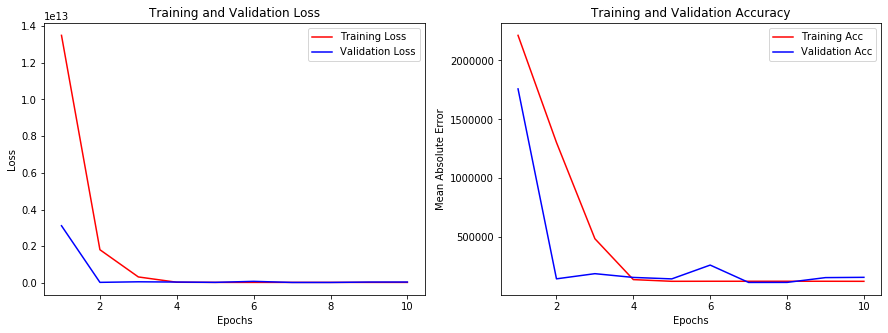

In [71]:
import matplotlib.pyplot as plt
history_dict = history.history
 
fig, (p1, p2) = plt.subplots(1, 2, figsize=(15,5))
 
x = range(1, EPOCHS+1)
 
p1.plot(x, history_dict['loss'], 'r', label='Training Loss')
p1.plot(x, history_dict['val_loss'], 'b', label='Validation Loss')
p1.set_title('Training and Validation Loss')
p1.set_xlabel('Epochs')
p1.set_ylabel('Loss')
p1.legend()
 
p2.plot(x, history_dict['mean_absolute_error'], 'r', label='Training Acc')
p2.plot(x, history_dict['val_mean_absolute_error'], 'b', label='Validation Acc')
p2.set_title('Training and Validation Accuracy')
p2.set_xlabel('Epochs')
p2.set_ylabel('Mean Absolute Error')
p2.legend()
 
plt.show()